In [1]:
#importar bibliotecas útiles en el programa
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#1) LECTURA DE DATOS
def LecDatos():
    """
    Función que ayuda en la lectura de datos iniciales del problema
    La función regresa los valores para su uso posterior
    """
    print('DATOS DE ENTRADA')
    L=float(input('Longitud de la barra: '))
    TA=float(input('Temperatura al inicio de la barra: '))
    TB=float(input('Temperatura al final de la barra: '))
    k=float(input('Conductividad térmica: '))
    N=int(input('Número de nodos (incluir los nodos extremos): '))
    nQ=int(input('Número de fuentes de calor: '))
    if nQ==0:
        Q=Crea_Matriz(N-2,1)
    else:
        Q=Crea_Matriz(N-2,1)
        print('Escribir valores (si es un sumidero agregar un signo menos)')
        for i in range(nQ):
            x=int(input('Nodo donde se encuentra: '))
            Q[x]=float(input('Valor de la fuente: '))
            
    return(L,TA, TB, k, N,Q)

In [3]:
#2) CREACIÓN DE MATRIZ
def Crea_Matriz(n,m):
    """
    Función que crea una matriz con las dimensiones dadas
    """
    return np.zeros((n,m))

In [22]:
# 3) LLENADO DE LAS MATRICES
def Matriz_ll(L,TA,TB,k,N):
    """
    Función que crea las matrices con la información útil
    Utiliza la función Crea_Matriz para crear cada matriz 
    Además calcula algunos valores extra a usar en otro momento
    """
    
    #Tamaño de las divisiones
    h=L/(N-1)
    
    #Cálculo de r
    r=k/(h**2)
    
    #Matriz de coeficientes
    A=Crea_Matriz(N-2,N-2)
    for i in range(N-2):
        for j in range(N-2):
            if (i==j):
                A[i][j]=-2
            if(np.fabs(i-j)==1):
                A[i][j]=1
    
    #Matriz de temperaturas frontera
    Tf=Crea_Matriz(N-2,1)
    Tf[0]=-TA
    Tf[N-3]=-TB
    
    #Matriz de Temperaturas en todo el dominio
    Temp=Crea_Matriz(N,1)
    Temp[0]=TA
    Temp[N-1]=TB
    
    #Matriz de distancias
    Dist=Crea_Matriz(N,1)
    Dist[0]=0
    for i in range (1,N):
        Dist[i]=Dist[i-1]+h
    
    return (h,r,A,Tf,Temp,Dist)

In [23]:
#4) IMPRIMIR MATRICES
def Imprime_Matriz(a):
    """
    Función de apoyo para imprimir en pantalla la matriz dada
    """
    [n,m]=a.shape
    print('\n')
    for i in range (n):
        for j in range (m):
            print(a[i][j],end=' ')
        print('\n')

In [24]:
#5) FUNCIÓN ANALITICA
def F_Real(TA,TB,L):
    """
    Función que calcula la solución analítica
    """

    y=lambda x: TA+x*(TB-TA)/L
    x=np.linspace(0,L,30)
    
    return (x,y(x))

In [25]:
#6) SOLUCIÓN APROXIMADA
def Sol_Aprox(A,Tf,Temp,Q,r,N):
    """
    Función que resuelve el sistema de matrices [A][x]=[b] y debuelve la solución
    """
    
    #Definicion de la matriz b
    b=Tf+(1/r)*Q
    
    #Resolviendo el sistema
    Temp[1:N-1] = np.linalg.solve(A,b)
    
    return Temp

In [26]:
#7) GRÁFICAS
def Graf(x,y,nombre,Nx,Ny,linea):
    """
    Función para realización de gráficas de resultados
    """
    plt.plot(x,y,linea)
    plt.title(nombre)
    plt.xlabel(Nx)
    plt.ylabel(Ny)
    #plt.legend()
    plt.show()

In [27]:
#Programa principal
[L,TA,TB,k,N,Q]=LecDatos()
[h,r,A,Tf,Temp,Dist]=Matriz_ll(L,TA,TB,k,N)

DATOS DE ENTRADA
Longitud de la barra: 0.5
Temperatura al inicio de la barra: 100
Temperatura al final de la barra: 500
Conductividad térmica: 10
Número de nodos (incluir los nodos extremos): 6
Número de fuentes de calor: 0


In [28]:
print('\n\tMatriz de Coeficientes')
Imprime_Matriz(A)


	Matriz de Coeficientes


-2.0 1.0 0.0 0.0 

1.0 -2.0 1.0 0.0 

0.0 1.0 -2.0 1.0 

0.0 0.0 1.0 -2.0 



In [29]:
print('\n\tMatriz de Temperaturas a lo largo de la barra')
Imprime_Matriz(Temp)


	Matriz de Temperaturas a lo largo de la barra


100.0 

0.0 

0.0 

0.0 

0.0 

500.0 



In [30]:
print('\n\tMatriz de Temperaturas en fronteras')
Imprime_Matriz(Tf)


	Matriz de Temperaturas en fronteras


-100.0 

0.0 

0.0 

-500.0 



In [31]:
print('\n\tMatriz de Fuentes')
Imprime_Matriz(Q)


	Matriz de Fuentes


0.0 

0.0 

0.0 

0.0 



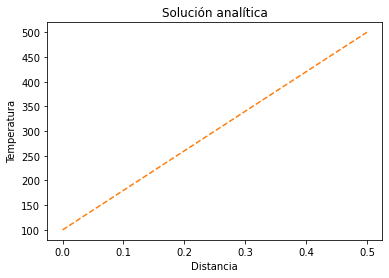

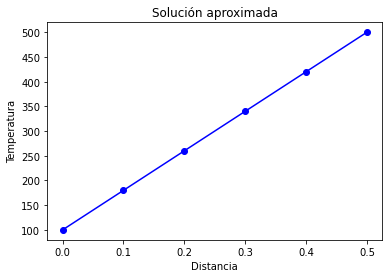

In [32]:
[x,y]=F_Real(TA,TB,L)
Temp=Sol_Aprox(A,Tf,Temp,Q,r,N)

Graf(x,y,'Solución analítica','Distancia','Temperatura','C1--')
Graf(Dist,Temp,'Solución aproximada','Distancia','Temperatura','-bo')